In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

In [4]:
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd

In [16]:
df = pd.read_csv('datasets/combined_cleaned.csv')

/var/folders/b8/5ss2hq456f5c51g_w7bst95c0000gn/T/ipykernel_99690/2730261680.py:4: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


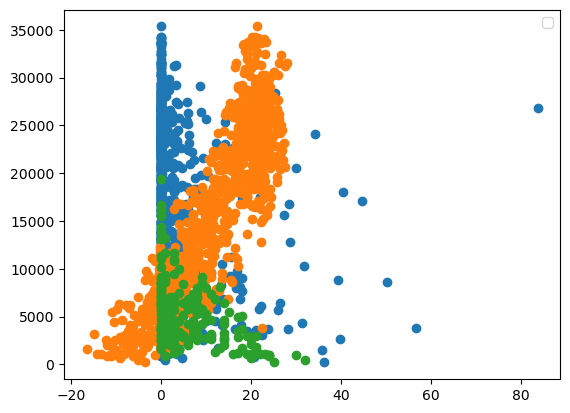

In [41]:
plt.scatter(df['Total Precip (mm)'], df['total_riders'])
plt.scatter(df['Mean Temp (°C)'], df['total_riders'])
plt.scatter(df['Snow on Grnd (cm)'], df['total_riders'])

In [18]:
df = df.iloc[:, 2:]
df

,total_riders,Mean Temp (°C),Snow on Grnd (cm),Total Precip (mm)
0,2851,1.5,NaN,2.4
1,1135,-6.3,3.0,2.0
2,2157,-8.4,3.0,0.0
3,3371,-1.2,3.0,0.0
4,2870,0.2,3.0,0.3
...,...,...,...,...
999,34299,20.8,NaN,0.0
1000,32797,18.7,NaN,0.0
1001,27871,20.5,NaN,0.1
1002,28001,20.1,NaN,0.0


In [19]:
# Drop unused columns
df_model = df[['total_riders', 'Mean Temp (°C)', 'Total Precip (mm)', 'Snow on Grnd (cm)']].copy()

In [20]:
# Handle missing values (simple fill)
df_model = df_model.fillna(0)

In [21]:
# Split into X (features) and y (target)
X = df_model[['Mean Temp (°C)', 'Total Precip (mm)', 'Snow on Grnd (cm)']].values.astype('float32')
y = df_model[['total_riders']].values.astype('float32')

In [22]:
# Convert to tensors
X_tensor = torch.tensor(X)
y_tensor = torch.tensor(y)

dataset = TensorDataset(X_tensor, y_tensor)
loader = DataLoader(dataset, batch_size=32, shuffle=True)

In [23]:
# Define a simple neural network
class RidershipNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(3, 16),
            nn.ReLU(),
            nn.Linear(16, 8),
            nn.ReLU(),
            nn.Linear(8, 1)
        )

    def forward(self, x):
        return self.net(x)

model = RidershipNN()
loss_fn = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [39]:
# Train the model
epochs = 200
loss_history = []

for epoch in range(epochs):
    for batch_X, batch_y in loader:
        pred = model(batch_X)
        loss = loss_fn(pred, batch_y)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    loss_history.append(loss.item())

loss_history[-10:]

[60847732.0,
 14864017.0,
 14128536.0,
 7618485.5,
 8763900.0,
 4221580.5,
 8596587.0,
 10319189.0,
 5025419.5,
 6867048.0]

In [25]:
model.eval()

RidershipNN(
  (net): Sequential(
    (0): Linear(in_features=3, out_features=16, bias=True)
    (1): ReLU()
    (2): Linear(in_features=16, out_features=8, bias=True)
    (3): ReLU()
    (4): Linear(in_features=8, out_features=1, bias=True)
  )
)

In [35]:
mean_temp = 25
precip = 32
snow = 0

input_tensor = torch.tensor([[mean_temp, precip, snow]], dtype=torch.float32)

In [36]:
with torch.no_grad():
    prediction = model(input_tensor)

In [37]:
predicted_riders = prediction.item()
print("Predicted riders:", predicted_riders)

Predicted riders: 21893.66015625


In [42]:
torch.save(model.state_dict(), "model.pth")